In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
g = nx.Graph([(1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,1), (1,5), (2,6), (3,7), (4,8)])

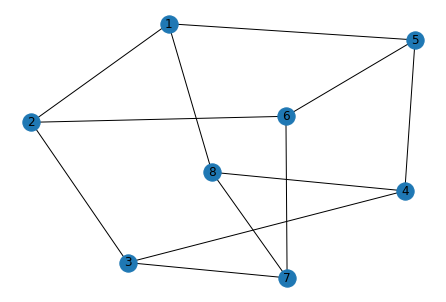

In [52]:
nx.draw(g, with_labels = True)
plt.show()

In [56]:
max(nx.degree(g))[1]

3

In [58]:
cycle_lst = list()
directed_g = nx.DiGraph(g)
for cycle in list(nx.simple_cycles(directed_g)):
    if len(cycle) == len(directed_g.nodes):
        cycle_lst.append(cycle)

In [59]:
cycle_lst

[[1, 5, 6, 7, 8, 4, 3, 2],
 [1, 5, 4, 3, 2, 6, 7, 8],
 [1, 8, 4, 5, 6, 7, 3, 2],
 [1, 8, 7, 3, 4, 5, 6, 2],
 [1, 8, 7, 6, 2, 3, 4, 5],
 [1, 8, 7, 6, 5, 4, 3, 2],
 [1, 2, 6, 5, 4, 3, 7, 8],
 [1, 2, 3, 7, 6, 5, 4, 8],
 [1, 2, 3, 4, 8, 7, 6, 5],
 [1, 2, 3, 4, 5, 6, 7, 8]]

In [97]:
hm_cycles = list()

for cycle in cycle_lst:
    hm = True
    tmp_g = nx.cycle_graph(cycle)
    for node in tmp_g.nodes():
        nei = g.neighbors(node)
        for n in nei:
            short_len = nx.shortest_path_length(tmp_g, node, n)
            if short_len > 1 and short_len != math.ceil(g.order()/2) and short_len != math.floor(g.order()/2):
                hm = False
                continue
        if not hm:
            break
    if hm: hm_cycles.append(cycle)
    
            

In [96]:
hm_cycles

[[1, 8, 7, 6, 5, 4, 3, 2], [1, 2, 3, 4, 5, 6, 7, 8]]